#### Importing all the library

In [808]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
import sklearn
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from imblearn.over_sampling import SMOTENC, SMOTE
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D 
from dataclasses import dataclass
import math

In [748]:
df = pd.read_csv('bank-additional-full.csv', sep = ";")

In [749]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### Check for null values

In [750]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### EDA 

#### Categorical Features

In [751]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [752]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Job

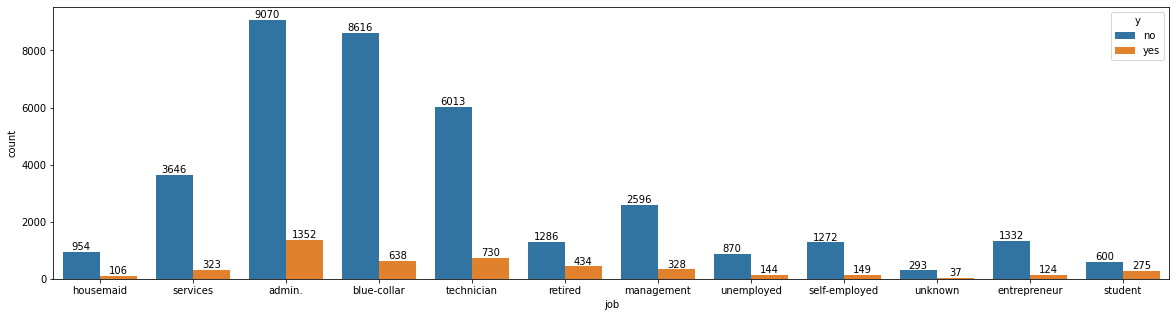

In [753]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(data=df,x='job', hue="y",ax=ax)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### Marital

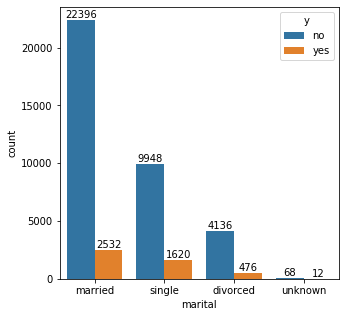

In [754]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data=df,x='marital', hue="y",ax=ax)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### Education

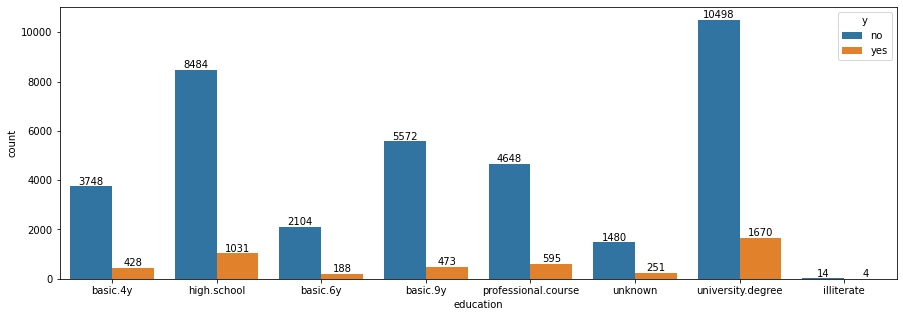

In [755]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(data=df,x='education', hue="y",ax=ax)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### Default

There arent many values for 'yes'. Therfore 'yes' will be merged with 'unknown'

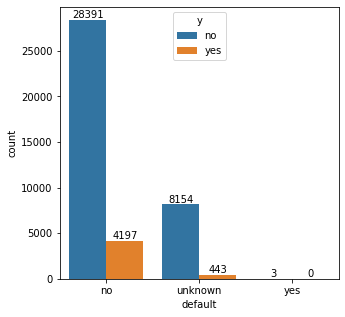

In [756]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data=df,x='default', hue="y",ax=ax)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### Housing

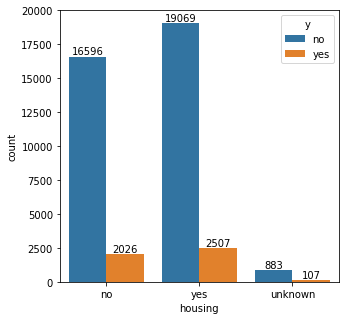

In [757]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data=df,x='housing', hue="y",ax=ax)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### Loan

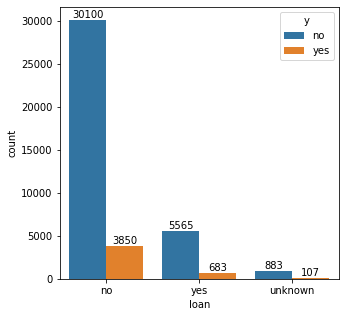

In [758]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(data=df,x='loan', hue="y",ax=ax)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### Contact

This is one of the columns with high correlation with the target variable

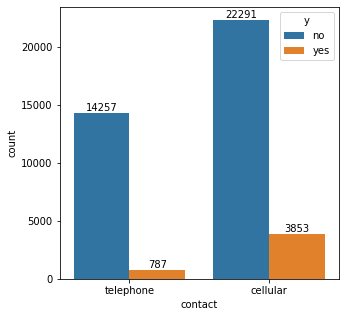

In [759]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data=df,x='contact', hue="y",ax=ax)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### Month

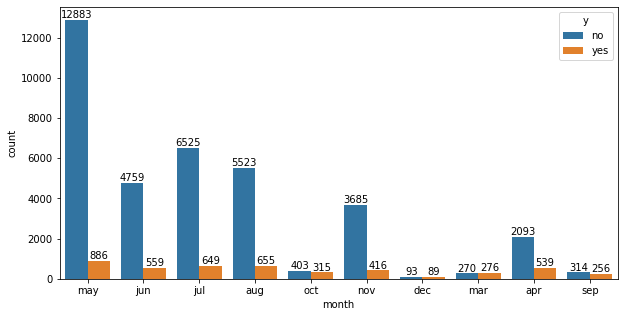

In [760]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data=df,x='month', hue="y",ax=ax)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### Day of the week

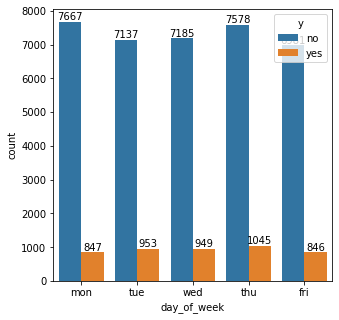

In [761]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data=df,x='day_of_week', hue="y",ax=ax)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

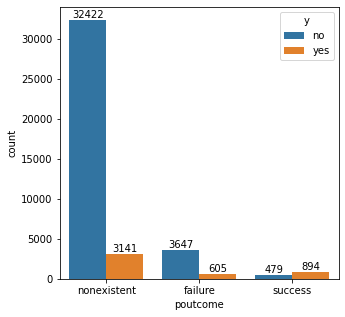

In [762]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data=df,x='poutcome', hue="y",ax=ax)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### Converting Pdays

Although this column is mentioned as numerical, its behaviour can be represented in a categorical way

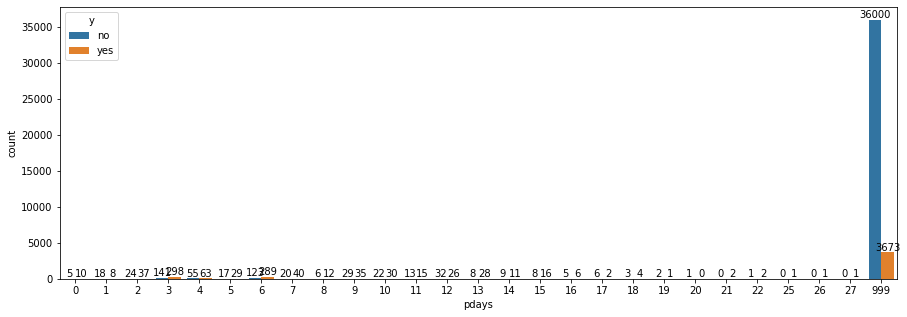

In [763]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(data=df,x='pdays', hue="y",ax=ax)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### Convert the numeric column to categorical

In [764]:
def func(x):
    if x == 999:
        return 0
    else:
        return 1

df['pdays'] = df['pdays'].apply(lambda x: func(x))

In [765]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### Numeric data

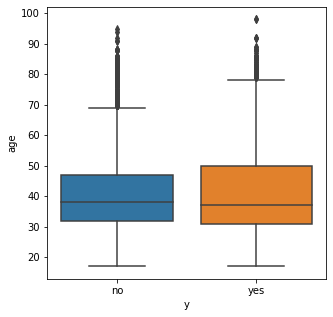

In [766]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data = df, x = 'y', y = 'age', ax=ax)
plt.show()

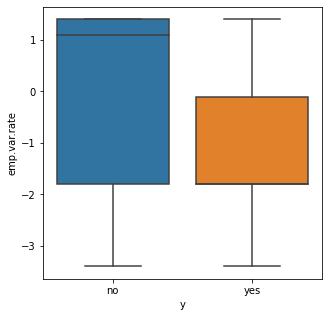

In [767]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data = df, x = 'y', y = 'emp.var.rate', ax=ax)
plt.show()

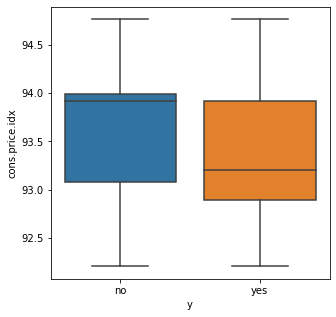

In [768]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data = df, x = 'y', y = 'cons.price.idx', ax=ax)
plt.show()

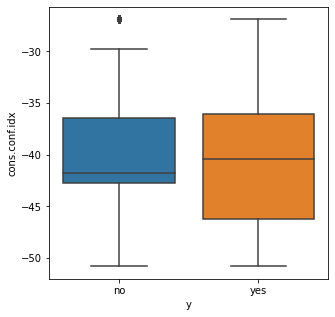

In [769]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data = df, x = 'y', y = 'cons.conf.idx', ax=ax)
plt.show()           

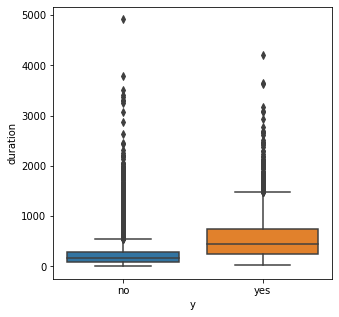

In [770]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data = df, x = 'y', y = 'duration', ax=ax)
plt.show()           

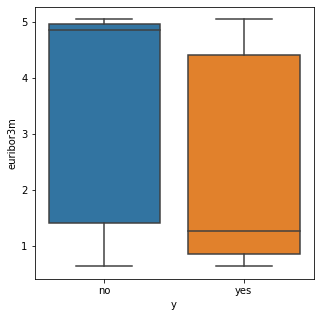

In [771]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data = df, x = 'y', y = 'euribor3m', ax=ax)
plt.show()

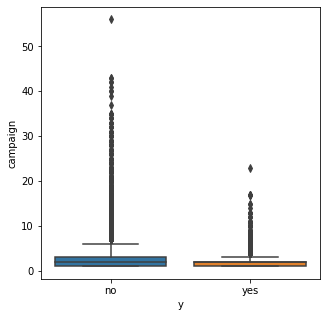

In [772]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data = df, x = 'y', y = 'campaign', ax=ax)
plt.show()           

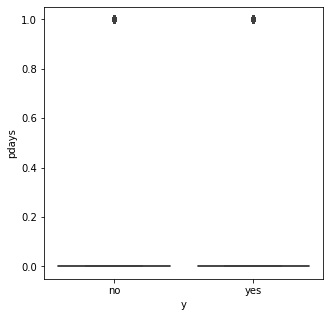

In [773]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data = df, x = 'y', y = 'pdays', ax=ax)
plt.show()           

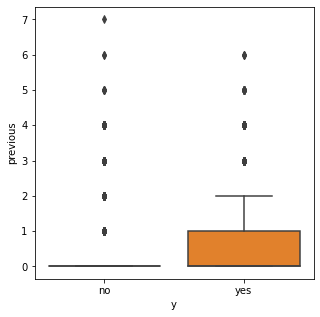

In [774]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data = df, x = 'y', y = 'previous', ax=ax)
plt.show()           

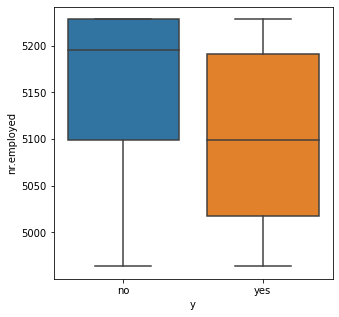

In [775]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data = df, x = 'y', y = 'nr.employed', ax=ax)
plt.show()           

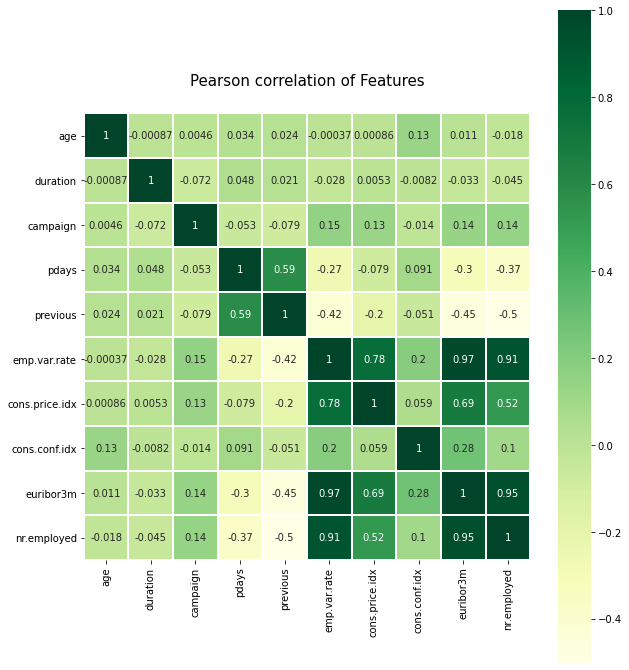

In [776]:
%matplotlib inline
corr = df.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)
plt.show()

We can evidently see euribor3m, nr.employed, emp.var.rate are highly correlated

#### Data Engineering

#### Categorical features

In [777]:
df_categorical = df[['job', 'marital','education','default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome', 'pdays']]

#### Chi2 test

Performing chi-square test over categorical columns to find the p value 

In [778]:
X = df_categorical
y = df['y']

In [779]:
label_encoder = LabelEncoder()
X['job'] = label_encoder.fit_transform(X['job'])
X['marital'] = label_encoder.fit_transform(X['marital'])
X['education'] = label_encoder.fit_transform(X['education'])
X['default'] = label_encoder.fit_transform(X['default'])
X['housing'] = label_encoder.fit_transform(X['housing'])
X['loan'] = label_encoder.fit_transform(X['loan'])
X['contact'] = label_encoder.fit_transform(X['contact'])
X['month'] = label_encoder.fit_transform(X['month'])
X['day_of_week'] = label_encoder.fit_transform(X['day_of_week'])
X['poutcome'] = label_encoder.fit_transform(X['poutcome'])
X['pdays'] = label_encoder.fit_transform(X['pdays'])

<ipython-input-779-a1fbc6872327>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['job'] = label_encoder.fit_transform(X['job'])
<ipython-input-779-a1fbc6872327>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['marital'] = label_encoder.fit_transform(X['marital'])
<ipython-input-779-a1fbc6872327>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [780]:
chi_scores = chi2(X, y)

In [781]:
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(ascending = False, inplace = True)

#### P values for categorical columns

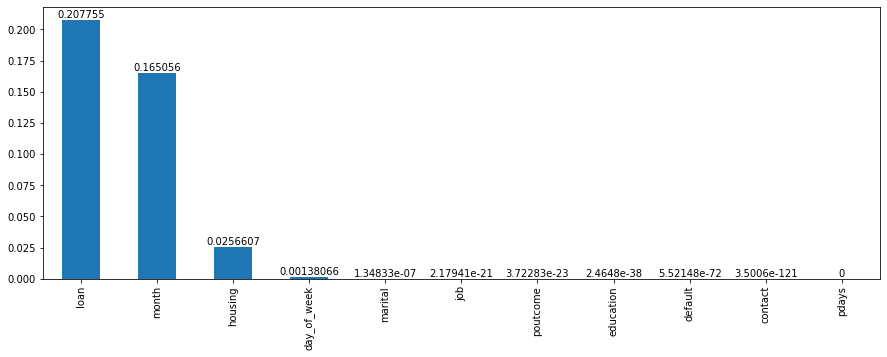

In [782]:
fig, ax = plt.subplots(figsize=(15,5))
p_values.plot.bar()
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### Therfore we drop these columns

In [783]:
drop_col = ['month','day_of_week','loan','housing','emp.var.rate']
df = df.drop(drop_col,axis=1)

In [784]:
df['y'].replace({'yes':1, 'no': 0}, inplace = True) 

#### Only 3 cases of default in the dataset, so cases merged unknown

In [785]:
df['default'].replace({'yes':'unknown'}, inplace = True)

In [786]:
X = df.loc[:, df.columns!='y']
y = df['y']

In [787]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'contact', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

#### OHE the remaining categorical columns

In [788]:
df_job = pd.get_dummies(df['job'])
df_marital = pd.get_dummies(df['marital'])
df_marital = df_marital.rename(columns = {'unknown': 'mariatl_unknown'})
df_education = pd.get_dummies(df['education'])
df_education = df_education.rename(columns = {'unknown': 'education_unknown'})
df_default = pd.get_dummies(df['default'])
df_default = df_default.rename(columns = {'unknown': 'default_unknown', 'no': 'default_no', 'yes': 'default_yes'})

In [789]:
X = X.drop(['job', 'marital', 'education', 'default'], axis = 1)

In [790]:
X = X.join(df_job)
X = X.join(df_marital)
X = X.join(df_education)
X = X.join(df_default)

#### Label encoding specific columns

In [791]:
X['contact'] = X['contact'].replace(['cellular','telephone'],[1,0])

In [792]:
X['poutcome'] = X['poutcome'].replace(['failure', 'nonexistent', 'success'],[0,1,2])

#### Splitting Dataset

In [793]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Skewed Dataset

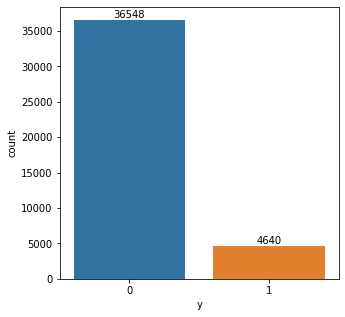

In [794]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data=df,x='y',ax=ax)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### Oversampling of training data using SMOTE

In [ ]:
categorical_cols = [i for i in range(11, 37)]
# appending pdays which has been specially encoded
categorical_cols.append(4)

In [795]:
sm = SMOTENC(random_state = 42, categorical_features = categorical_cols)
X_train, y_train = sm.fit_resample(X_train, y_train)

#### Normalizing the dataframe

In [796]:
num_col = ['age','duration','campaign','previous','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
mean = np.mean(X_train[num_col], axis=0)
std = np.std(X_train[num_col], axis=0)

X_train[num_col] = (X_train[num_col] - mean)/std
X_test[num_col] = (X_test[num_col] - mean)/std

In [797]:
X_train

,age,contact,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,...,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,education_unknown,default_no,default_unknown
0,-0.004327,1,-0.263278,1.669993,0,-0.398876,1,-0.050040,0.782420,1.058763,...,0,0,0,1,0,0,0,0,1,0
1,-0.441122,1,-0.899371,1.231783,0,-0.398876,1,-2.044817,1.678355,-1.117991,...,0,0,0,0,0,0,1,0,1,0
2,1.131342,0,-0.782196,-0.521055,0,-0.398876,1,0.832604,0.725232,1.002093,...,0,0,0,1,0,0,0,0,0,1
3,-1.402073,1,-0.762666,-0.521055,0,-0.398876,1,-0.642215,-1.314450,-0.816635,...,0,0,0,1,0,0,0,0,1,0
4,0.345110,1,-0.450200,-0.521055,0,-0.398876,1,0.710639,-0.475702,1.055055,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54831,-0.877918,1,-0.550635,-0.521055,1,3.235981,2,0.885939,0.360652,-1.094448,...,0,0,0,0,0,0,1,0,1,0
54832,0.345110,1,1.485977,-0.521055,0,-0.398876,1,0.021758,0.663670,1.058713,...,0,0,0,0,0,1,0,0,1,0
54833,-0.353763,1,-0.028928,-0.521055,0,-0.398876,1,-0.821953,-0.113515,-0.900000,...,0,0,0,0,0,0,1,0,1,0
54834,-0.004327,1,0.534628,0.355364,0,-0.398876,1,0.107853,0.521274,1.058323,...,0,0,0,0,0,0,1,0,1,0


#### Autoencoding for dimensionality reduction

In [798]:
X_ntrain = tf.cast(X_train, tf.float32)
X_ntest = tf.cast(X_test, tf.float32)

In [799]:
# This function returns the f1_scores, precision and recall
def evaluateFunction(y, y_hat): 
    y = (y == 1)
    y_hat = (y_hat == 1)
    precision = (y & y_hat).sum() / y_hat.sum()
    recall = (y & y_hat).sum() / y.sum()
    f_score = 2 * (precision * recall) / (precision + recall)
    return recall, precision, f_score

# Autoencoder class which is used for reducing dimensionality
class Autoencoder(Model):
    
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        
        self.latent_dim = latent_dim
        
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(latent_dim, activation = 'relu')
        ])
        
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(X_ntrain.shape[1], activation = 'sigmoid'),
        ])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
f1_scores = []
    
for i in range(1, 38):
    
    # Reduce dimensionality of dataset to i columns
    
    autoencoder = Autoencoder(i)
    autoencoder.compile(optimizer = 'adam', loss = tf.keras.losses.MeanSquaredError())
    autoencoder.fit(X_ntrain, X_ntrain, epochs = 10, validation_data = (X_ntest, X_ntest))

    reduced_train_df = autoencoder.encoder(X_ntrain) # reduced training datafrane
    reduced_test_df = autoencoder.encoder(X_ntest) # reduced testing dataframe
    
    # After dimensionality reduction, the values get scaled. Therfore it needs to be normalized.
    
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df_train_scaled = min_max_scaler.fit_transform(reduced_train_df.numpy())
    df_test_scaled = min_max_scaler.fit_transform(reduced_test_df.numpy())
    
    reduced_X_train = pd.DataFrame(df_train_scaled)
    reduced_X_test = pd.DataFrame(df_test_scaled)
    
    # ANN
    
    model0 = tf.keras.Sequential([
        tf.keras.layers.Dense(10, input_shape = (i,), activation = 'relu'),
        tf.keras.layers.Dense(10, input_shape = (10,), activation = 'relu'),
        tf.keras.layers.Dense(10, input_shape = (10,), activation = 'relu'),
        tf.keras.layers.Dense(2, activation = 'sigmoid')
    ])

    model0.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

    model0.fit(reduced_X_train, y_train, epochs = 5)
    
    # Predicting the values for test data
    
    y_hat_0 = model0.predict(reduced_X_test)
    
    y_hat_0 = np.argmax(y_hat_0, axis = 1)
    
    precision, recall, f_score = evaluateFunction(y_test, y_hat_0)
    
    print()
    print()
    
    print("Model ANN"+ str(i))

    print("The recall of the model was {}".format(recall))
    print("The precision of the model was {}".format(precision))
    print("The F1 score of the model was {}".format(f_score))
    
    f1_scores.append(f_score)
    
    print()
    print()

Epoch 1/10
1714/1714 [==============================] - 5s 3ms/step - loss: 0.3016 - val_loss: 0.2534
Epoch 2/10
1714/1714 [==============================] - 4s 2ms/step - loss: 0.2580 - val_loss: 0.2344: 0s - loss: 0
Epoch 3/10
1714/1714 [==============================] - 4s 2ms/step - loss: 0.2485 - val_loss: 0.2276
Epoch 4/10
1714/1714 [==============================] - 4s 2ms/step - loss: 0.2451 - val_loss: 0.2246s -  - ETA: 1s - loss - 
Epoch 5/10
1714/1714 [==============================] - 4s 2ms/step - loss: 0.2435 - val_loss: 0.2231
Epoch 6/10
1714/1714 [==============================] - 4s 2ms/step - loss: 0.2428 - val_loss: 0.2223
Epoch 7/10
1714/1714 [==============================] - 4s 2ms/step - loss: 0.2424 - val_loss: 0.2218
Epoch 8/10
1714/1714 [==============================] - 4s 2ms/step - loss: 0.2421 - val_loss: 0.2215 2s - - ETA: 0s - loss: 0.241 - ETA: 0s - loss: 0.2 - ETA: 0s - loss:
Epoch 9/10
1714/1714 [==============================] - 4s 2ms/step - loss: 0

In [800]:
f1_scores

[0.371745528639348,
 0.3578315834583244,
 0.42920137187653107,
 0.3958383740624244,
 0.4593933463796477,
 0.5065978198508319,
 0.5046542553191489,
 0.513126491646778,
 0.5035729298024381,
 0.5049786628733998,
 0.5115856428895956,
 0.5324675324675325,
 0.528,
 0.5145474137931035,
 0.43381180223285487,
 0.5544554455445545,
 0.5680129240710824,
 0.5416276894293733,
 0.5651634257343814,
 0.534235668789809,
 0.4316852737905369,
 0.38344491783323187,
 0.26839237057220705,
 0.5062082139446037,
 0.559102069449316,
 0.5228637413394919,
 0.4670846394984326,
 0.44023796646836133,
 0.27137042062415195,
 0.557865342848278,
 0.36724864539434077,
 0.4888427607680332,
 0.29722589167767505,
 0.33312302839116714,
 0.4859724203518782,
 0.536607142857143,
 0.22849083215796898]

#### Number of dimensions vs F1_scores

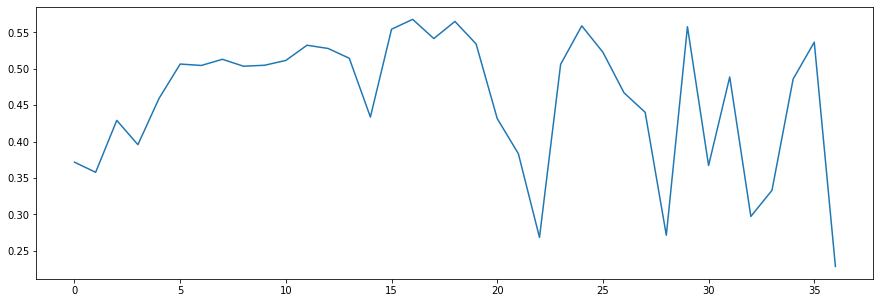

In [801]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(f1_scores)
plt.show()

In [802]:
np.argmax(f1_scores)

16

# ANN with K fold Cross Validation

In [848]:
df_split = np.array_split(X.join(y), 4)

In [849]:
df_split[0]

,age,contact,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,...,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,education_unknown,default_no,default_unknown,y
0,56,0,261,1,0,0,1,93.994,-36.4,4.857,...,0,0,0,0,0,0,0,1,0,0
1,57,0,149,1,0,0,1,93.994,-36.4,4.857,...,0,0,1,0,0,0,0,0,1,0
2,37,0,226,1,0,0,1,93.994,-36.4,4.857,...,0,0,1,0,0,0,0,1,0,0
3,40,0,151,1,0,0,1,93.994,-36.4,4.857,...,1,0,0,0,0,0,0,1,0,0
4,56,0,307,1,0,0,1,93.994,-36.4,4.857,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10292,40,0,60,2,0,0,1,94.465,-41.8,4.960,...,0,0,0,0,1,0,0,0,1,0
10293,31,0,179,2,0,0,1,94.465,-41.8,4.960,...,0,1,0,0,0,0,0,1,0,0
10294,45,0,162,6,0,0,1,94.465,-41.8,4.960,...,0,0,0,0,0,1,0,1,0,0
10295,46,0,227,1,0,0,1,94.465,-41.8,4.960,...,0,0,0,0,0,0,0,0,1,0


In [850]:
df_split[0].columns

Index(['age', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'unknown', 'divorced', 'married', 'single',
       'mariatl_unknown', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',
       'illiterate', 'professional.course', 'university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'y'],
      dtype='object')

In [851]:
categorical_cols = [i for i in range(11, 37)]
categorical_cols.append(4)

In [852]:
f1_scores = []

for i in range(0,4):
    
    # Dividing dataset into 4 parts
    
    df_train = pd.DataFrame()
    df_test = df_split[i]
    
    print(df_train.isna().sum())
    
    for j in range(0, 4):
        if j!=i:
            df_train = df_train.append(df_split[i], ignore_index = True)
    
    X_train = df_train.loc[:, df_train.columns!='y']
    y_train = df_train['y']
    X_test = df_test.loc[:, df_test.columns!='y']
    y_test = df_test['y']
    
    # Using SMOTE on training data
    
    sm = SMOTENC(random_state = 42, categorical_features = categorical_cols)
    X_train, y_train = sm.fit_resample(X_train, y_train)
    
    # Normalize data after SMOTE
    
    num_col = ['age','duration','campaign','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
    mean = np.mean(X_train[num_col], axis=0)
    std = np.std(X_train[num_col], axis=0)
    X_train[num_col] = (X_train[num_col] - mean)/std
    X_test[num_col] = (X_test[num_col] - mean)/std


    model0 = tf.keras.Sequential([
        tf.keras.layers.Dense(10, input_shape = (37,), activation = 'relu'),
        tf.keras.layers.Dense(10, input_shape = (10,), activation = 'relu'),
        tf.keras.layers.Dense(10, input_shape = (10,), activation = 'relu'),
        tf.keras.layers.Dense(2, activation = 'sigmoid')
    ])
    
    model0.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

    model0.fit(X_train, y_train, epochs = 5)

    y_hat_0 = model0.predict(X_test)

    y_hat_0 = np.argmax(y_hat_0, axis = 1)

    precision, recall, f_score = evaluateFunction(y_test, y_hat_0)

    print()
    print()

    print("Model "+ str(37))

    print("The recall of the model was {}".format(recall))
    print("The precision of the model was {}".format(precision))
    print("The F1 score of the model was {}".format(f_score))

    print()
    
    f1_scores.append(f_score)

print()
print(np.mean(f1_scores))

Series([], dtype: float64)


<ipython-input-852-5b5e50f7e63b>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_split[i], ignore_index = True)
<ipython-input-852-5b5e50f7e63b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[num_col] = (X_test[num_col] - mean)/std


Epoch 1/5
1866/1866 [==============================] - 5s 3ms/step - loss: 0.2287 - acc: 0.9132
Epoch 2/5
1866/1866 [==============================] - 5s 3ms/step - loss: 0.1597 - acc: 0.9485
Epoch 3/5
1866/1866 [==============================] - 5s 3ms/step - loss: 0.1465 - acc: 0.9539
Epoch 4/5
1866/1866 [==============================] - 5s 3ms/step - loss: 0.1375 - acc: 0.9575
Epoch 5/5
1866/1866 [==============================] - 5s 3ms/step - loss: 0.1315 - acc: 0.9608


Model 37
The recall of the model was 0.3137440758293839
The precision of the model was 0.9457142857142857
The F1 score of the model was 0.4711743772241993

Series([], dtype: float64)


<ipython-input-852-5b5e50f7e63b>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_split[i], ignore_index = True)
<ipython-input-852-5b5e50f7e63b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[num_col] = (X_test[num_col] - mean)/std


Epoch 1/5
1816/1816 [==============================] - 5s 3ms/step - loss: 0.2545 - acc: 0.9020
Epoch 2/5
1816/1816 [==============================] - 5s 3ms/step - loss: 0.1882 - acc: 0.9322
Epoch 3/5
1816/1816 [==============================] - 5s 3ms/step - loss: 0.1775 - acc: 0.9367
Epoch 4/5
1816/1816 [==============================] - 5s 3ms/step - loss: 0.1701 - acc: 0.9410
Epoch 5/5
1816/1816 [==============================] - 5s 3ms/step - loss: 0.1638 - acc: 0.9445


Model 37
The recall of the model was 0.4097320169252468
The precision of the model was 0.9477977161500816
The F1 score of the model was 0.5721319547021171

Series([], dtype: float64)


<ipython-input-852-5b5e50f7e63b>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_split[i], ignore_index = True)
<ipython-input-852-5b5e50f7e63b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[num_col] = (X_test[num_col] - mean)/std


Epoch 1/5
1740/1740 [==============================] - 5s 3ms/step - loss: 0.3509 - acc: 0.8516
Epoch 2/5
1740/1740 [==============================] - 4s 3ms/step - loss: 0.2870 - acc: 0.8836
Epoch 3/5
1740/1740 [==============================] - 4s 2ms/step - loss: 0.2712 - acc: 0.8885
Epoch 4/5
1740/1740 [==============================] - 4s 3ms/step - loss: 0.2622 - acc: 0.8929A: 0s - loss: 0.
Epoch 5/5
1740/1740 [==============================] - 5s 3ms/step - loss: 0.2561 - acc: 0.8962A


Model 37
The recall of the model was 0.3902127659574468
The precision of the model was 0.8999018645731109
The F1 score of the model was 0.5443751855149896

Series([], dtype: float64)


<ipython-input-852-5b5e50f7e63b>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_split[i], ignore_index = True)
<ipython-input-852-5b5e50f7e63b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[num_col] = (X_test[num_col] - mean)/std


Epoch 1/5
1433/1433 [==============================] - 4s 3ms/step - loss: 0.4490 - acc: 0.7918
Epoch 2/5
1433/1433 [==============================] - 4s 3ms/step - loss: 0.3981 - acc: 0.8211
Epoch 3/5
1433/1433 [==============================] - 4s 2ms/step - loss: 0.3768 - acc: 0.8302
Epoch 4/5
1433/1433 [==============================] - 4s 2ms/step - loss: 0.3553 - acc: 0.8409A: 0s - loss: 0.3561 - acc: 0.
Epoch 5/5
1433/1433 [==============================] - 4s 3ms/step - loss: 0.3465 - acc: 0.8442


Model 37
The recall of the model was 0.5984728804634017
The precision of the model was 0.8551542513167796
The F1 score of the model was 0.7041511771995044


0.5729581736602026


# ANN with Hold out set

In [853]:
model0 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = (37,), activation = 'relu'),
    tf.keras.layers.Dense(10, input_shape = (10,), activation = 'relu'),
    tf.keras.layers.Dense(10, input_shape = (10,), activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'sigmoid')
])

model0.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

model0.fit(X_train, y_train, epochs = 5)

y_hat_0 = model0.predict(X_test)

y_hat_0 = np.argmax(y_hat_0, axis = 1)

precision, recall, f_score = evaluateFunction(y_test, y_hat_0)

print()
print()

print("Model "+ str(37))

print("The recall of the model was {}".format(recall))
print("The precision of the model was {}".format(precision))
print("The F1 score of the model was {}".format(f_score))

print()

Epoch 1/5
1433/1433 [==============================] - 4s 3ms/step - loss: 0.4370 - acc: 0.8009
Epoch 2/5
1433/1433 [==============================] - 4s 3ms/step - loss: 0.3890 - acc: 0.8261A: 1s - lo - ETA: 0s - loss: 0.3894 - acc: 0.82 - ETA: 0s - loss: 0.3893 - acc: - ETA: 0s - loss: 0.3889 - acc: 0.8
Epoch 3/5
1433/1433 [==============================] - 4s 3ms/step - loss: 0.3672 - acc: 0.8362
Epoch 4/5
1433/1433 [==============================] - 5s 4ms/step - loss: 0.3489 - acc: 0.8425
Epoch 5/5
1433/1433 [==============================] - 5s 3ms/step - loss: 0.3424 - acc: 0.8455A: 2s - loss: 0.3438 - - ETA: 1s


Model 37
The recall of the model was 0.5938531877063754
The precision of the model was 0.8796087283671934
The F1 score of the model was 0.7090219863532979



# ANN with Autoencoder and K fold cross validation

In [855]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

num_col = ['age','duration','campaign','previous','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
mean = np.mean(X_train[num_col], axis=0)
std = np.std(X_train[num_col], axis=0)

X_train[num_col] = (X_train[num_col] - mean)/std
X_test[num_col] = (X_test[num_col] - mean)/std

X_ntrain = tf.cast(X_train, tf.float32)
X_ntest = tf.cast(X_test, tf.float32)

autoencoder = Autoencoder(16)
autoencoder.compile(optimizer = 'adam', loss = tf.keras.losses.MeanSquaredError())
autoencoder.fit(X_ntrain, X_ntrain, epochs = 10, validation_data = (X_ntest, X_ntest))

reduced_train_df = autoencoder.encoder(X_ntrain)
reduced_test_df = autoencoder.encoder(X_ntest)

mean = np.mean(reduced_train_df)
std = np.std(reduced_train_df)
reduced_train_df = (reduced_train_df- mean)/std
reduced_test_df = (reduced_test_df - mean)/std


reduced_X_train = pd.DataFrame(reduced_train_df)
reduced_X_test = pd.DataFrame(reduced_test_df)

y_train = y_train.reset_index(drop = True)

df_split = np.array_split(reduced_X_train.join(y_train), 4)

from imblearn.over_sampling import SMOTENC, SMOTE

f1_scores = []

for i in range(0,4):
    df_train = pd.DataFrame()
    df_test = df_split[i]
    
    for j in range(0, 4):
        if j!=i:
            df_train = df_train.append(df_split[i], ignore_index = True)
            
    
    X_train = df_train.loc[:, df_train.columns!='y']
    y_train = df_train['y']
    X_test = df_test.loc[:, df_test.columns!='y']
    y_test = df_test['y']
    
    
    sm = SMOTE()
    X_train, y_train = sm.fit_resample(X_train, y_train)
    
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    X_train = (X_train - mean)/std
    X_test = (X_test - mean)/std


    model0 = tf.keras.Sequential([
        tf.keras.layers.Dense(10, input_shape = (16,), activation = 'relu'),
        tf.keras.layers.Dense(10, input_shape = (10,), activation = 'relu'),
        tf.keras.layers.Dense(10, input_shape = (10,), activation = 'relu'),
        tf.keras.layers.Dense(2, activation = 'sigmoid')
    ])
    
    model0.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

    model0.fit(X_train, y_train, epochs = 5)

    y_hat_0 = model0.predict(X_test)

    y_hat_0 = np.argmax(y_hat_0, axis = 1)

    precision, recall, f_score = evaluateFunction(y_test, y_hat_0)

    print()
    print()

    print("Model "+ str(16))

    print("The recall of the model was {}".format(recall))
    print("The precision of the model was {}".format(precision))
    print("The F1 score of the model was {}".format(f_score))

    print()
    
    f1_scores.append(f_score)
    print()
    
print(np.mean(f1_scores))

Epoch 1/10
966/966 [==============================] - 3s 2ms/step - loss: 0.2315 - val_loss: 0.1725
Epoch 2/10
966/966 [==============================] - 2s 2ms/step - loss: 0.1570 - val_loss: 0.1495
Epoch 3/10
966/966 [==============================] - 2s 2ms/step - loss: 0.1446 - val_loss: 0.1430
Epoch 4/10
966/966 [==============================] - 2s 2ms/step - loss: 0.1401 - val_loss: 0.1398
Epoch 5/10
966/966 [==============================] - 2s 2ms/step - loss: 0.1377 - val_loss: 0.1379
Epoch 6/10
966/966 [==============================] - 2s 2ms/step - loss: 0.1361 - val_loss: 0.1364
Epoch 7/10
966/966 [==============================] - 2s 2ms/step - loss: 0.1349 - val_loss: 0.1354
Epoch 8/10
966/966 [==============================] - 2s 2ms/step - loss: 0.1342 - val_loss: 0.1349
Epoch 9/10
966/966 [==============================] - 2s 2ms/step - loss: 0.1337 - val_loss: 0.1345
Epoch 10/10
966/966 [==============================] - 2s 2ms/step - loss: 0.1332 - val_loss: 0.1339

<ipython-input-855-1c3c6cc04c72>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_split[i], ignore_index = True)


Epoch 1/5
1282/1282 [==============================] - 4s 3ms/step - loss: 0.3602 - acc: 0.8497A: 1s - lo
Epoch 2/5
1282/1282 [==============================] - 3s 3ms/step - loss: 0.2905 - acc: 0.8848
Epoch 3/5
1282/1282 [==============================] - 3s 3ms/step - loss: 0.2785 - acc: 0.8909
Epoch 4/5
1282/1282 [==============================] - 3s 2ms/step - loss: 0.2701 - acc: 0.8944A: 0s - loss: 0.2700 - acc
Epoch 5/5
1282/1282 [==============================] - 3s 3ms/step - loss: 0.2633 - acc: 0.8983A: 1s - loss: 0.2639 - acc: - ETA: 1


Model 16
The recall of the model was 0.4422875131164743
The precision of the model was 0.9493243243243243
The F1 score of the model was 0.6034359341445956




<ipython-input-855-1c3c6cc04c72>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_split[i], ignore_index = True)


Epoch 1/5
1291/1291 [==============================] - 4s 3ms/step - loss: 0.3809 - acc: 0.8368A: 1s - loss: 0.4283 - acc: 0.80 - ETA: 1s -
Epoch 2/5
1291/1291 [==============================] - 3s 2ms/step - loss: 0.3081 - acc: 0.8762
Epoch 3/5
1291/1291 [==============================] - 3s 3ms/step - loss: 0.2956 - acc: 0.8826A: 2s - loss: 0.2917 - acc
Epoch 4/5
1291/1291 [==============================] - 3s 2ms/step - loss: 0.2876 - acc: 0.8854
Epoch 5/5
1291/1291 [==============================] - 3s 2ms/step - loss: 0.2817 - acc: 0.8891A: 0s - loss: 0.2


Model 16
The recall of the model was 0.42151004888647475
The precision of the model was 0.9227110582639715
The F1 score of the model was 0.5786726323639075




<ipython-input-855-1c3c6cc04c72>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_split[i], ignore_index = True)


Epoch 1/5
1296/1296 [==============================] - 4s 3ms/step - loss: 0.3806 - acc: 0.8331
Epoch 2/5
1296/1296 [==============================] - 3s 3ms/step - loss: 0.2947 - acc: 0.8819A: 0s - loss:
Epoch 3/5
1296/1296 [==============================] - 4s 3ms/step - loss: 0.2814 - acc: 0.8887
Epoch 4/5
1296/1296 [==============================] - 3s 3ms/step - loss: 0.2739 - acc: 0.8915
Epoch 5/5
1296/1296 [==============================] - 3s 3ms/step - loss: 0.2695 - acc: 0.8937


Model 16
The recall of the model was 0.4354932866316404
The precision of the model was 0.9153374233128835
The F1 score of the model was 0.5901898734177216




<ipython-input-855-1c3c6cc04c72>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_split[i], ignore_index = True)


Epoch 1/5
1280/1280 [==============================] - 4s 3ms/step - loss: 0.3844 - acc: 0.8316
Epoch 2/5
1280/1280 [==============================] - 3s 3ms/step - loss: 0.3156 - acc: 0.8715
Epoch 3/5
1280/1280 [==============================] - 4s 3ms/step - loss: 0.3006 - acc: 0.8769
Epoch 4/5
1280/1280 [==============================] - 3s 3ms/step - loss: 0.2907 - acc: 0.8823
Epoch 5/5
1280/1280 [==============================] - 3s 3ms/step - loss: 0.2833 - acc: 0.8864A: 0s - loss: 0.2822 - acc: 


Model 16
The recall of the model was 0.42588832487309647
The precision of the model was 0.9332591768631813
The F1 score of the model was 0.5848727779714187


0.5892928044744108


## ANN with Autoencoder and Hold Out Set

In [858]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

num_col = ['age','duration','campaign','previous','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
mean = np.mean(X_train[num_col], axis=0)
std = np.std(X_train[num_col], axis=0)

X_train[num_col] = (X_train[num_col] - mean)/std
X_test[num_col] = (X_test[num_col] - mean)/std

X_ntrain = tf.cast(X_train, tf.float32)
X_ntest = tf.cast(X_test, tf.float32)

autoencoder = Autoencoder(16)
autoencoder.compile(optimizer = 'adam', loss = tf.keras.losses.MeanSquaredError())
autoencoder.fit(X_ntrain, X_ntrain, epochs = 10, validation_data = (X_ntest, X_ntest))

reduced_train_df = autoencoder.encoder(X_ntrain)
reduced_test_df = autoencoder.encoder(X_ntest)

mean = np.mean(reduced_train_df)
std = np.std(reduced_train_df)
reduced_train_df = (reduced_train_df- mean)/std
reduced_test_df = (reduced_test_df - mean)/std

reduced_X_train = pd.DataFrame(reduced_train_df)
reduced_X_test = pd.DataFrame(reduced_test_df)

y_train = y_train.reset_index(drop = True)

sm = SMOTE()
reduced_X_train, y_train = sm.fit_resample(reduced_X_train, y_train)

mean = np.mean(reduced_X_train)
std = np.std(reduced_X_train)
reduced_X_train = (reduced_X_train - mean)/std
reduced_X_test = (reduced_X_test - mean)/std

model0 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = (16,), activation = 'relu'),
    tf.keras.layers.Dense(10, input_shape = (10,), activation = 'relu'),
    tf.keras.layers.Dense(10, input_shape = (10,), activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'sigmoid')
])

model0.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

model0.fit(reduced_X_train, y_train, epochs = 5)

y_hat_0 = model0.predict(reduced_X_test)

y_hat_0 = np.argmax(y_hat_0, axis = 1)

precision, recall, f_score = evaluateFunction(y_test, y_hat_0)

print()
print()

print("Model "+ str(37))

print("The recall of the model was {}".format(recall))
print("The precision of the model was {}".format(precision))
print("The F1 score of the model was {}".format(f_score))

print()

Epoch 1/10
966/966 [==============================] - 3s 3ms/step - loss: 0.2380 - val_loss: 0.1807
Epoch 2/10
966/966 [==============================] - 2s 2ms/step - loss: 0.1603 - val_loss: 0.1520
Epoch 3/10
966/966 [==============================] - 2s 2ms/step - loss: 0.1436 - val_loss: 0.1435
Epoch 4/10
966/966 [==============================] - 2s 2ms/step - loss: 0.1387 - val_loss: 0.1407
Epoch 5/10
966/966 [==============================] - 2s 2ms/step - loss: 0.1368 - val_loss: 0.1393
Epoch 6/10
966/966 [==============================] - 2s 2ms/step - loss: 0.1355 - val_loss: 0.1381
Epoch 7/10
966/966 [==============================] - 2s 2ms/step - loss: 0.1343 - val_loss: 0.1370
Epoch 8/10
966/966 [==============================] - 2s 2ms/step - loss: 0.1336 - val_loss: 0.1364
Epoch 9/10
966/966 [==============================] - 2s 2ms/step - loss: 0.1331 - val_loss: 0.1359
Epoch 10/10
966/966 [==============================] - 2s 2ms/step - loss: 0.1327 - val_loss: 0.1355

c:\users\aditb\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:3370: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Epoch 1/5
1716/1716 [==============================] - 5s 3ms/step - loss: 0.3541 - acc: 0.8523A: 1s -
Epoch 2/5
1716/1716 [==============================] - 4s 3ms/step - loss: 0.3040 - acc: 0.8776A: 0s - loss: 0.3040 - ac
Epoch 3/5
1716/1716 [==============================] - 4s 3ms/step - loss: 0.2985 - acc: 0.8805
Epoch 4/5
1716/1716 [==============================] - 4s 3ms/step - loss: 0.2948 - acc: 0.8809A: 1s - loss:  - ETA: 0s - loss: 0.2931 -
Epoch 5/5
1716/1716 [==============================] - 4s 3ms/step - loss: 0.2918 - acc: 0.8831


Model 37
The recall of the model was 0.40829778984102366
The precision of the model was 0.878231859883236
The F1 score of the model was 0.5574377977766014

